In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [33]:
"""
Algorithm for emulating the Loihi neuron model
"""
# Notes
#  * The refactory period is not considered
#  * The calculation of the actual weight consideres no restrictions

# Define seed
np.random.seed(1)

# Define round away from zero
def rnd(val):
    rounded = int(np.sign(val)*np.ceil(np.abs(val)))
    return rounded

# Define max time (runtime)
t_max = 100

# Define spike input
p_spike = 0.25  # probabilty of an input spike at any given time step
S = (np.random.rand(t_max) <= p_spike).astype(int)  # array, 1 for spike, 0 else

# Define weight
theta = 0  # can be -8 to +7
w = 10 # can be -256 to +255
J = w * 2**(6.0 + theta)
# Note that the actual weight J on Loihi can differ from the here defined J
# depending on: weight bits, weight exponent, synapse sign mode and memory limits

# Define threshold
v_th_mant = 11 # can be 0 to 131071
v_th = v_th_mant * 2**6

# Define voltage and current decay
decay_v = 2048
_tau_v = decay_v/2**12  # equals 1/tau_v
decay_I = 2048
_tau_I = decay_I/2**12  # equals 1/tau_I

# Initialise read outs
I, v, spks = np.zeros(t_max, dtype=int), np.zeros(t_max, dtype=int), np.zeros(t_max, dtype=int)

for t in range(1, t_max):

    # Spike input
    s = S[t]

    # Update and read synaptic input
    I[t] = I[t-1] - rnd(_tau_I * I[t-1]) + J*s

    # Update and read voltage
    v[t] = v[t-1] - rnd(_tau_v * v[t-1]) + I[t]

    # Check threshold
    if v[t] > v_th:
        # Read spike
        spks[t] = 1
        # Reset voltage
        v[t] = 0

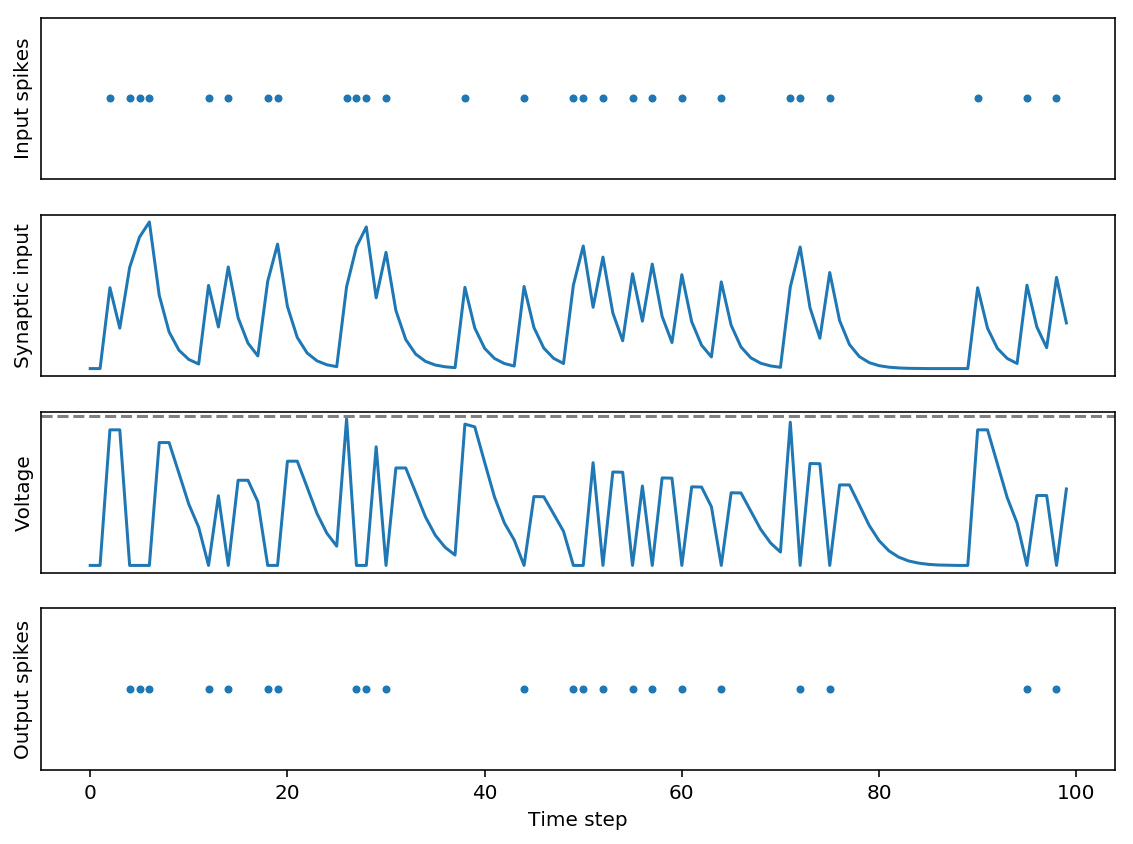

In [36]:
"""
Plot results
"""

time = np.arange(0,t_max,1)

# Plot input spike train
fig, axs = plt.subplots(4, 1, figsize=(8,6))
axs[0].scatter(time, S, marker=".")
axs[0].set_xticks([])
axs[0].set_ylim(0.9,1.1)
axs[0].set_yticks([])
axs[0].set_ylabel("Input spikes")

# Plot synaptic input (current)
axs[1].plot(time, I)
axs[1].set_xticks([])
axs[1].set_yticks([])
axs[1].set_ylabel("Synaptic input")

# Plot voltage
axs[2].plot(time, v)
axs[2].axhline(v_th, linestyle="--", color="gray")
axs[2].set_xticks([])
axs[2].set_yticks([])
axs[2].set_ylabel("Voltage")

# Plot output spike train
axs[3].scatter(time, spks, marker=".")
axs[3].set_xlabel("Time step")
axs[3].set_ylim(0.9,1.1)
axs[3].set_yticks([])
axs[3].set_ylabel("Output spikes")

fig.tight_layout()
plt.show()